In [1]:
%run ../scripts/notebook_settings_lean.py
import glob

/faststorage/project/baboondiversity/people/eriks/second_analysis_baboons/scripts/notebook_settings_lean.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', 'png')


In [2]:
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering.txt", sep =" ")
meta_data_samples_Sci = meta_data_samples.copy()
for i, row in meta_data_samples_Sci.iterrows():
    if row.PGDP_ID[0] != "P":
        meta_data_samples_Sci.at[i, "PGDP_ID"] = "Sci_"+str(row.PGDP_ID)

Reading in the pilot investigation.

In [3]:
relernn_path = "/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/relernn/"

In [4]:
df_l = []
for o in ["Dendro", "Arusha", "Ngorongoro"]: #meta_data_samples_Sci.Origin.unique():
    short_origin = o.replace(" ", ",").split(",")[0]
    df = pd.read_csv(relernn_path + short_origin + "/" + short_origin + ".PREDICT.txt", sep="\t")
    df["origin"] = short_origin
    df_l.append(df)


In [5]:
np.corrcoef(df_l[0].recombRate, df_l[1].recombRate)

array([[1.        , 0.57750172],
       [0.57750172, 1.        ]])

In [6]:
np.corrcoef(df_l[0].recombRate, df_l[2].recombRate)

array([[1.        , 0.63150652],
       [0.63150652, 1.        ]])

In [7]:
np.corrcoef(df_l[1].recombRate, df_l[2].recombRate)

array([[1.        , 0.56857946],
       [0.56857946, 1.        ]])

<AxesSubplot:xlabel='recombRate', ylabel='recombRate'>

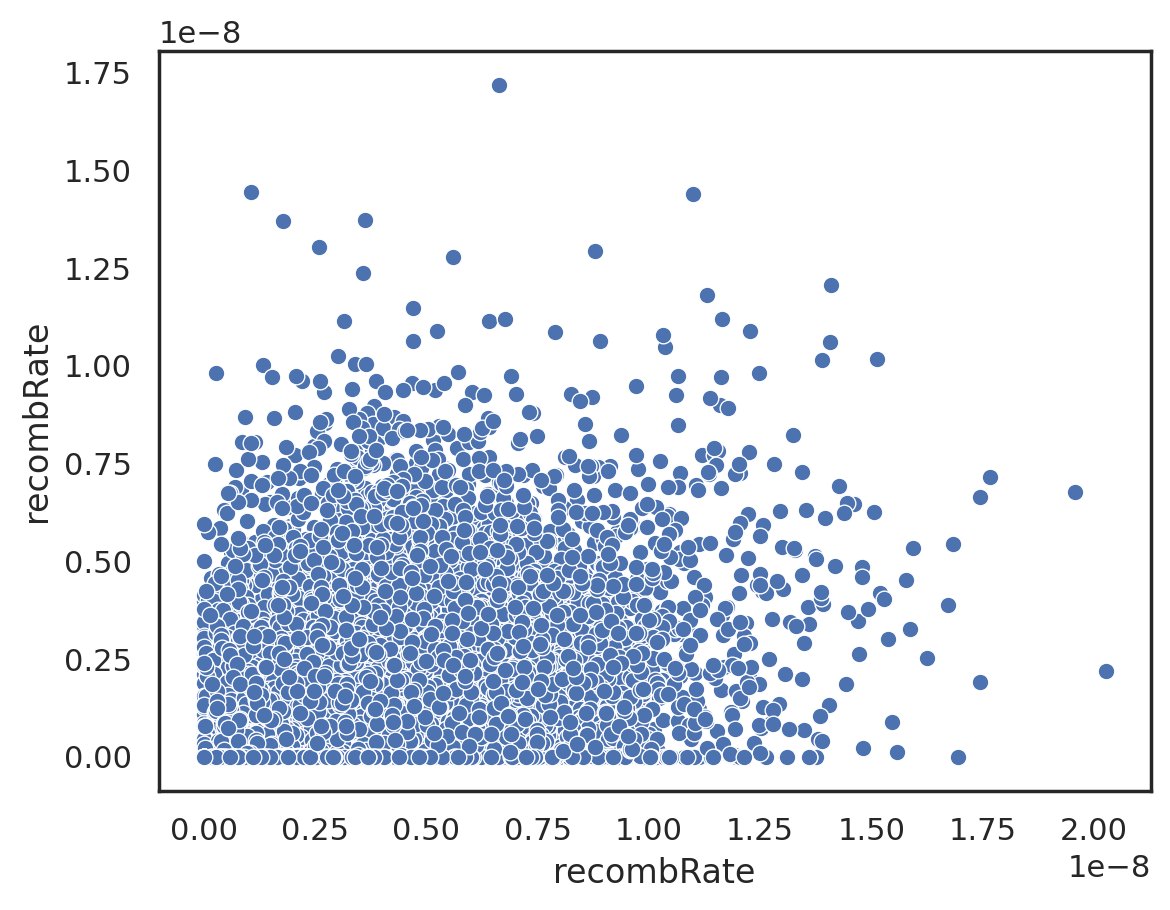

In [8]:
sns.scatterplot(x=df_l[2].recombRate, y=df_l[1].recombRate)

In [9]:
df_l[2]

,chrom,start,end,nSites,recombRate,origin
0,b'chr1',0,24000,1071,7.064376e-10,Ngorongoro
1,b'chr1',24000,48000,749,1.845660e-09,Ngorongoro
2,b'chr1',48000,72000,862,0.000000e+00,Ngorongoro
3,b'chr1',72000,96000,978,0.000000e+00,Ngorongoro
4,b'chr1',96000,120000,973,1.352643e-09,Ngorongoro
...,...,...,...,...,...,...
139775,b'chr20',71968000,71984000,536,1.280276e-09,Ngorongoro
139776,b'chr20',71984000,72000000,576,0.000000e+00,Ngorongoro
139777,b'chr20',72000000,72016000,628,1.108888e-09,Ngorongoro
139778,b'chr20',72016000,72032000,587,5.798614e-10,Ngorongoro


In [10]:
df_l[0]

,chrom,start,end,nSites,recombRate,origin
0,b'chr1',0,24000,1071,1.789245e-09,Dendro
1,b'chr1',24000,48000,749,4.572349e-11,Dendro
2,b'chr1',48000,72000,862,1.874155e-09,Dendro
3,b'chr1',72000,96000,978,0.000000e+00,Dendro
4,b'chr1',96000,120000,973,2.908796e-09,Dendro
...,...,...,...,...,...,...
139775,b'chr20',71968000,71984000,536,1.016049e-09,Dendro
139776,b'chr20',71984000,72000000,576,1.746421e-09,Dendro
139777,b'chr20',72000000,72016000,628,5.910757e-10,Dendro
139778,b'chr20',72016000,72032000,587,1.363058e-11,Dendro


In [11]:
example_df = df_l[1]
example_chrom = example_df.loc[example_df.chrom == "b'chr4'"]

<AxesSubplot:xlabel='start', ylabel='recombRate'>

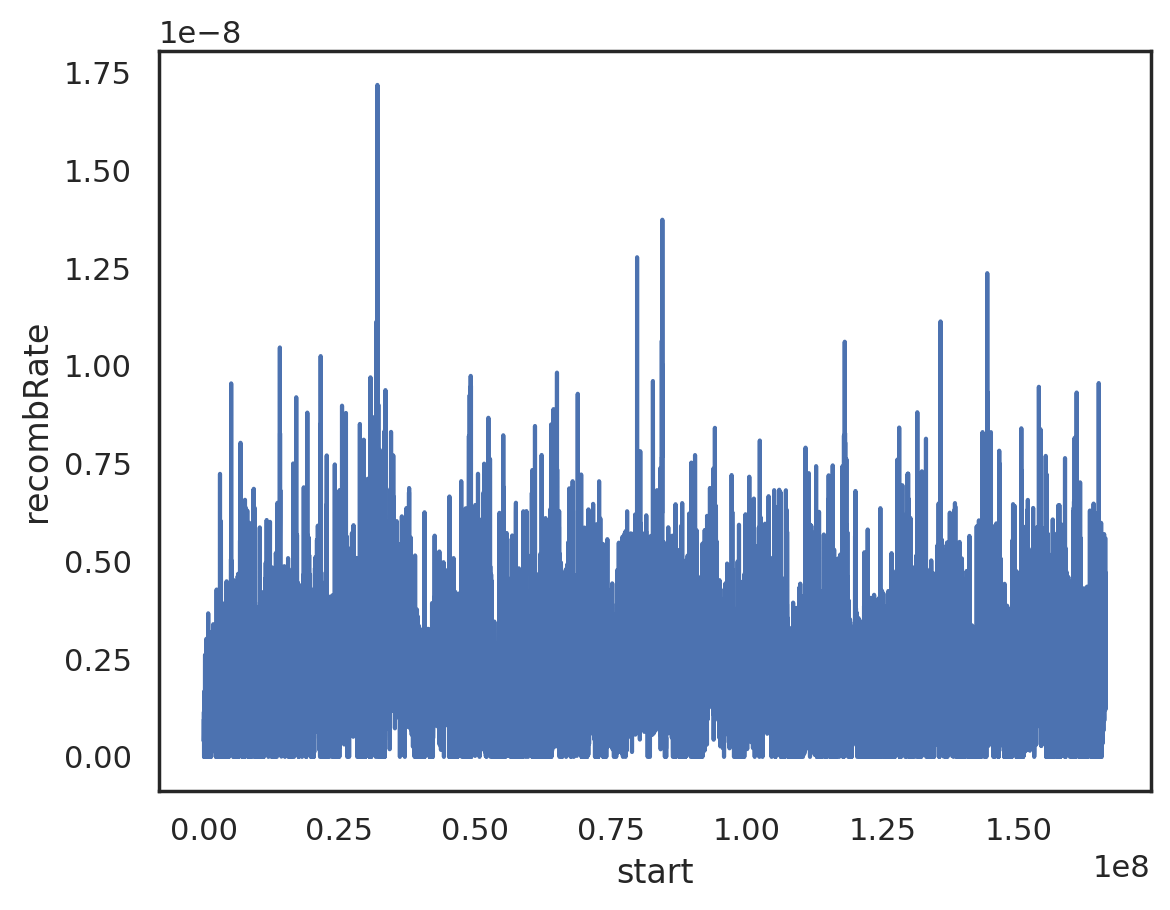

In [12]:
sns.lineplot(data=example_chrom, x="start", y="recombRate")

In [13]:
example_chrom.rolling(10).mean()[9:]

,start,end,nSites,recombRate
27771,40500.0,49500.0,368.3,5.755011e-10
27772,49500.0,58500.0,363.5,5.344531e-10
27773,58500.0,67500.0,363.8,6.620074e-10
27774,67500.0,76500.0,367.7,7.317215e-10
27775,76500.0,85500.0,368.6,8.053816e-10
...,...,...,...,...
46207,165991500.0,166000500.0,211.4,3.550884e-09
46208,166000500.0,166009500.0,219.1,3.665082e-09
46209,166009500.0,166018500.0,229.0,3.531550e-09
46210,166018500.0,166027500.0,239.5,3.300626e-09


<AxesSubplot:xlabel='start', ylabel='recombRate'>

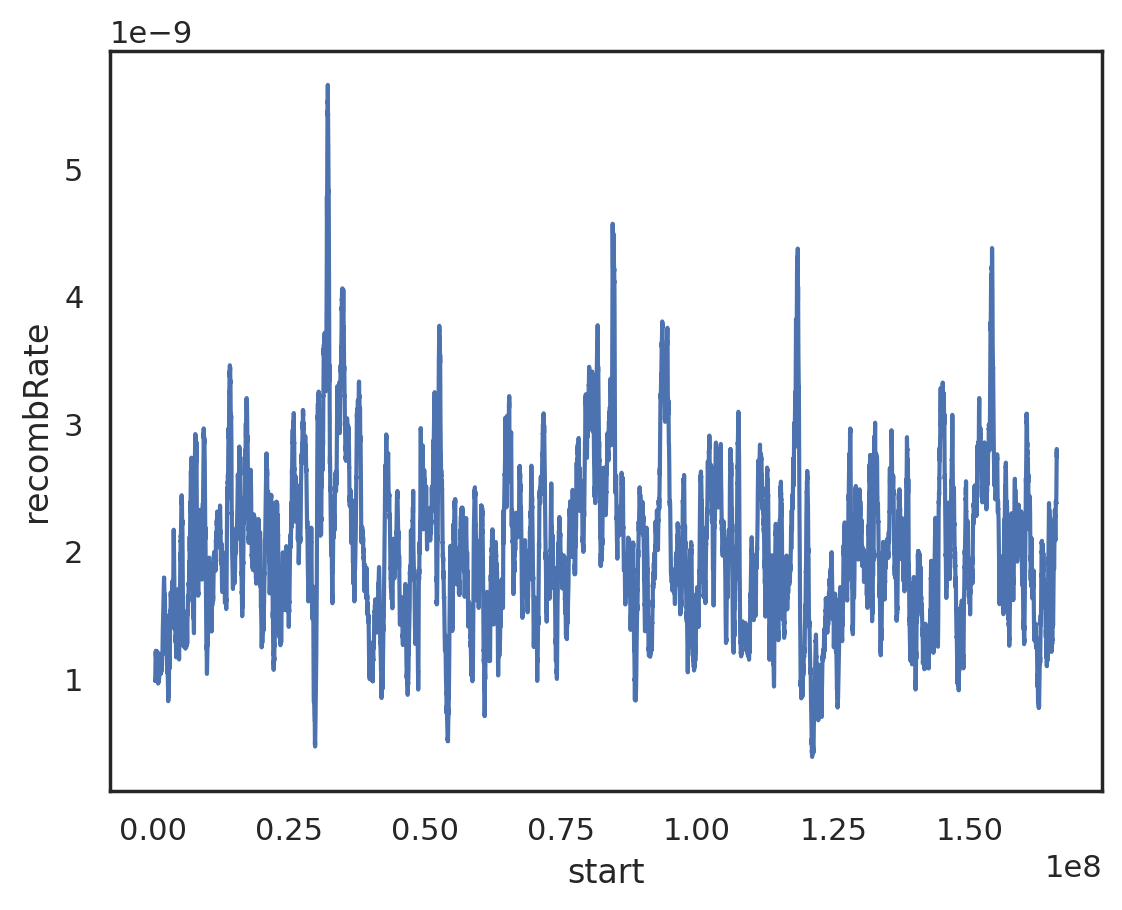

In [14]:
sns.lineplot(y=example_chrom.rolling(50).mean()[49:].recombRate, x=example_chrom.start[49:])

Total inferred chrom sizes.

In [15]:
for df in df_l:
    for chrom in df.chrom.unique():
        chrom_df = df.loc[df.chrom == chrom]
        chrom_df["window_size"] = chrom_df.end - chrom_df.start
        chrom_df["genetic_distance"] = chrom_df.window_size*chrom_df.recombRate
        print(chrom, chrom_df.genetic_distance.sum())

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


b'chr1' 0.08114808217973084
b'chr2' 0.15331474787071137
b'chr3' 0.07584647581299155
b'chr4' 0.6377446237098194
b'chr5' 0.14432684453761838
b'chr6' 0.11274078865102838
b'chr7' 0.08938419790219806
b'chr8' 0.05714764542612032
b'chr9' 0.12972178366209072
b'chr10' 0.07342181193206111
b'chr11' 0.04978309877089275
b'chr12' 0.2505694030457939
b'chr13' 0.054596080074546874
b'chr14' 0.05560146102265453
b'chr15' 0.11249022471989364
b'chr16' 0.036037226990609676
b'chr17' 0.033804383821637835
b'chr18' 0.028662076362925948
b'chr19' 0.020508113553117914
b'chr20' 0.06438863713537037
b'chr1' 0.050410815316602554
b'chr2' 0.06359711489203877
b'chr3' 0.03680041817121224
b'chr4' 0.3368793410980827
b'chr5' 0.04914400236900242
b'chr6' 0.04112137888803252
b'chr7' 0.037811284163371574
b'chr8' 0.029390102868655
b'chr9' 0.04547588267627929
b'chr10' 0.02828289629254347
b'chr11' 0.03870561162148984
b'chr12' 0.08909352745040416
b'chr13' 0.01881048336618197
b'chr14' 0.05664847209322711
b'chr15' 0.0380897827836196
b'

BSCORRECT check

In [16]:
df_l_bs = []
for o in ["Dendro", "Arusha", "Ngorongoro"]: #meta_data_samples_Sci.Origin.unique():
    short_origin = o.replace(" ", ",").split(",")[0]
    df = pd.read_csv(relernn_path + short_origin + "/" + short_origin + ".PREDICT.BSCORRECTED.txt", sep="\t")
    df["origin"] = short_origin
    df_l_bs.append(df)


<AxesSubplot:xlabel='recombRate', ylabel='recombRate'>

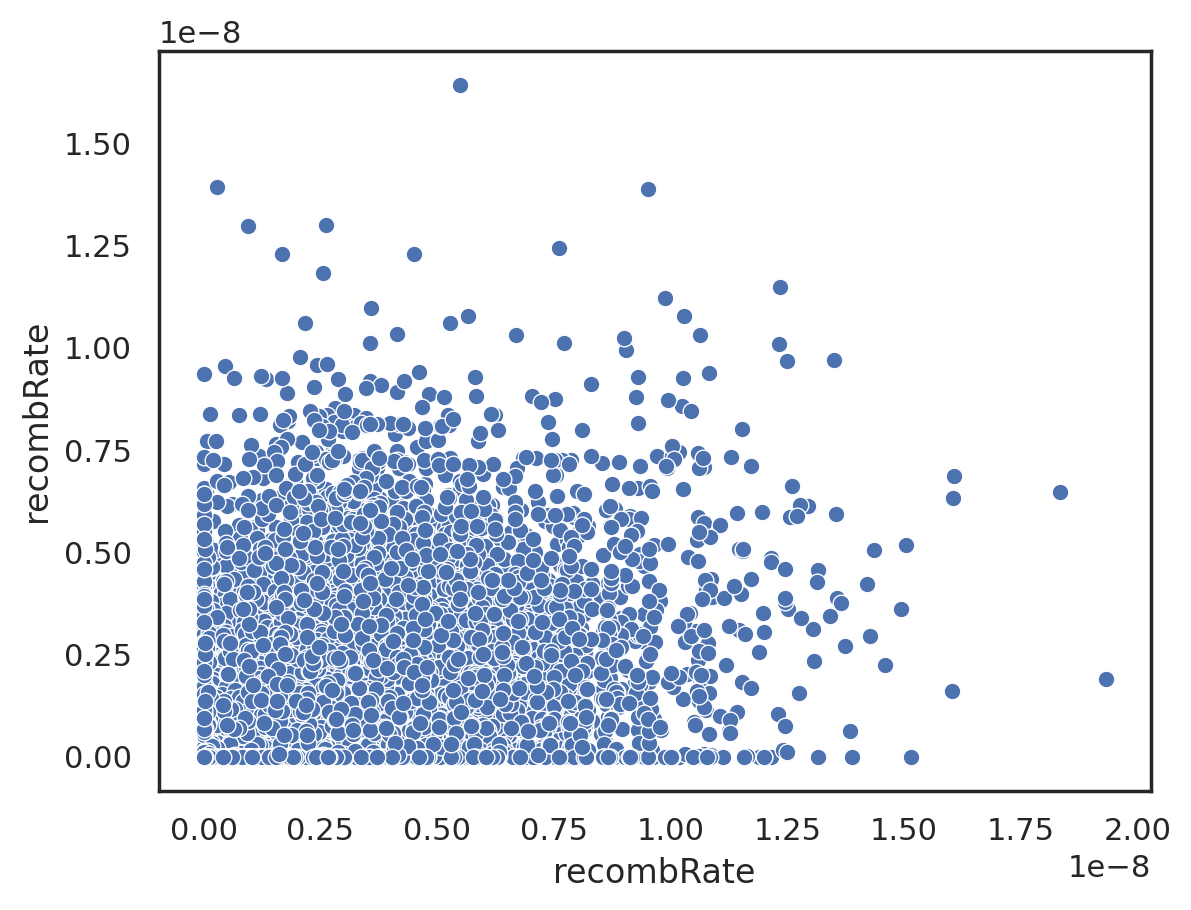

In [17]:
sns.scatterplot(x=df_l_bs[2].recombRate, y=df_l_bs[1].recombRate)